In [1]:
import pandas as pd
import random as rd
from numpy import *
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataun.csv")

In [2]:
X=df.values
#X=X[:,0:2]
#mu awal
n=len(X.T) # banyak feature
cx_all=[] 
x_all_all=[]
for i in range (7):
    x=zeros((n,i+1))
    for j in range (n):
        for k in range (i+1):
            x[j,k]=rd.uniform(min(X[:,j]),max(X[:,j])) #generate centroid awal
    epoch=15
    x_all=[]
    for j in range (epoch):
        cx=zeros((len(X),i+1))
        x1=array(x)
        x_all.append([x1])
        for k in range (len (X)):
            jarak=zeros((i+1))
            for l in range (i+1):
                jarak[l]=sqrt(sum((X[k,:]-x[:,l])**2))
            i_min=where(jarak==min(jarak))[0]
            cx[k][i_min[0]]=1
        for k in range (n):
            for l in range (i+1):
                if sum(cx[:,l])!=0:
                    x[k,l]=sum(cx[:,l]*X[:,k])/sum(cx[:,l])
    cx_all.append([cx])
    x_all_all.append([x])

In [3]:
#Elbow Method
WCSS=[]
for j in range (7):
    a_all=[]
    for i in range (len(X)):
        n=where(cx_all[j][0][i]==1)[0][0]
        a=norm(X[i,:]-x_all_all[j][0].T[n])
        a_all.append(a)
    a_sum=sum(a_all)
    WCSS.append(a_sum)

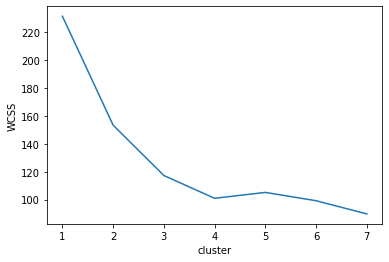

In [4]:
d={'cluster':[1,2,3,4,5,6,7],'WCSS':WCSS}
data=pd.DataFrame(d)
sns.lineplot(data=data, x="cluster", y="WCSS")